In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
from camera import take_picture
import numpy as np
import skimage.io as io
import matplotlib.image as mpimg

In [2]:
# run this cell to download the models from dlib
from dlib_models import download_model, download_predictor, load_dlib_models
download_model()
download_predictor()
from dlib_models import models

File already exists:
	/Users/caseygoldstein/DlibModels/dlib_models/dlib_face_recognition_resnet_model_v1.dat
File already exists:
	/Users/caseygoldstein/DlibModels/dlib_models/shape_predictor_68_face_landmarks.dat


<IPython.core.display.Javascript object>


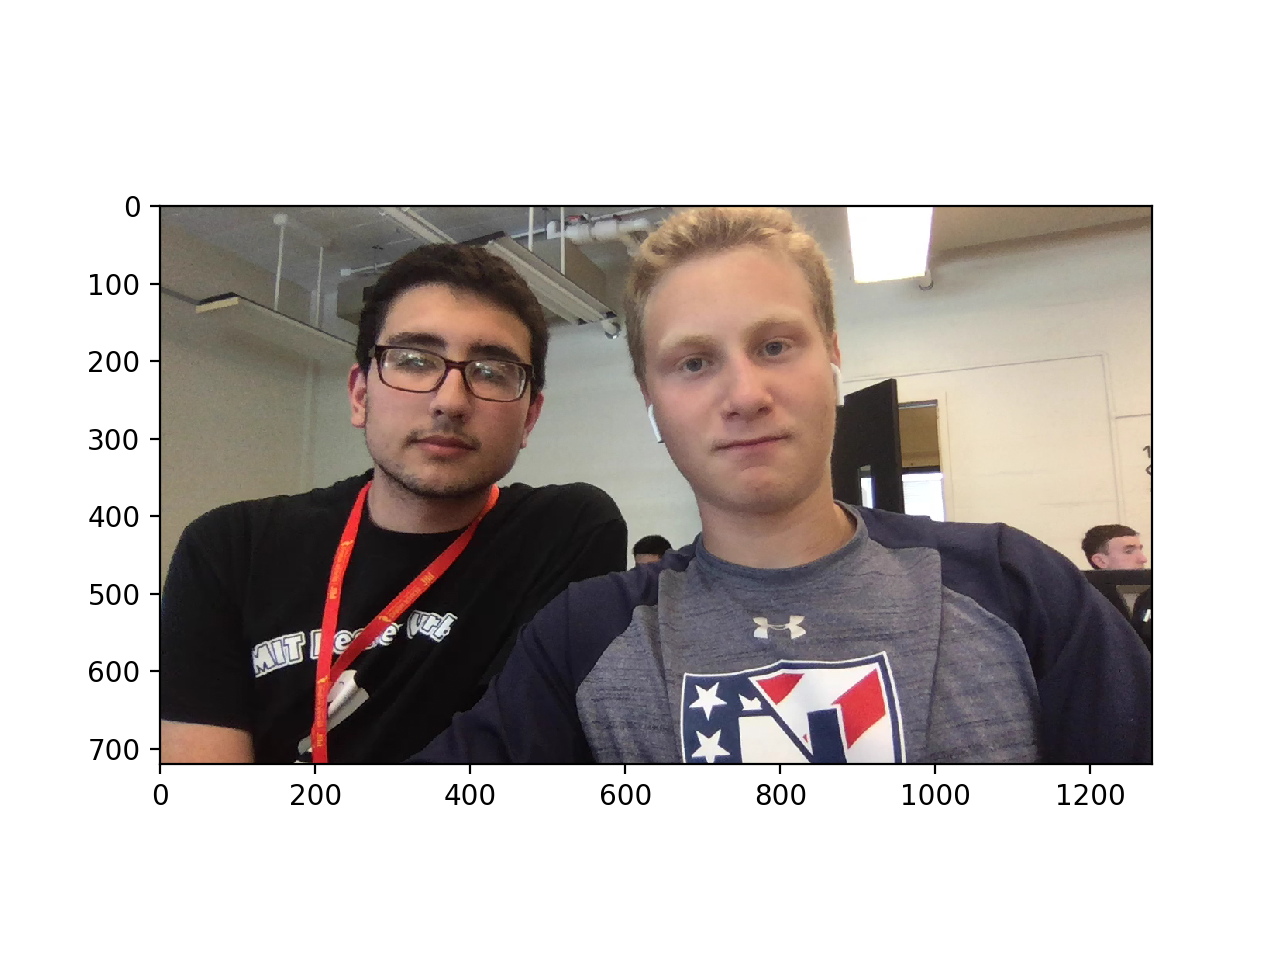

No camera config found, using defaults
	 port=0, exposure=0.7


In [15]:
load_dlib_models()
face_detect = models["face detect"]
face_rec_model = models["face rec"]
shape_predictor = models["shape predict"]



fig,ax = plt.subplots()
pic1 = take_picture()
ax.imshow(pic1)













In [17]:





#requires import skimage.io as io
def uploadimage(imgpath):
    pic = io.imread(impath)
    return pic


    
    

#takes in image --> returns descriptions for everyone in image

def makedescriptors (img):
    detections = list(face_detect(pic1))
    print(len(detections))
    descriptors = []
    for i in range(len(detections)):
        shape = shape_predictor(pic1, detections[i])
        descriptors.append(np.array(face_rec_model.compute_face_descriptor(pic1, shape)))
    return descriptors

#calculates difference between two image descriptions
def calcdiff(imgdesc1, imgdesc2):
    return np.sqrt(np.sum((imgdesc[:, np.newaxis] - imgdesc2[np.newaxis])**2, axis=2))

#takes in database and image description, and returns an array of all the people present in the photo
def labelface (database,imgdescs):
    
    keys_in_database = list(database.keys())
    values_in_database = list(database.values())
    

    
    output = []
    minvalindex = 0
    for i in range (len(descriptors)):
        for j in range(database):
            if (calcdiff(values_in_database[i],imgdescs[i]) < calcdiff(values_in_database[minvalindex],imgdescs[i])):
                minvalindex = i
        output.append(keys_in_database[minvalindex])
        
    return output


        
print(labelface(database,pic1))

[1, 2]
